### Filters

In [1]:
import radon
import scipy.linalg
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets 
from ipywidgets import interactive

import matplotlib as mpl

/home/kabri/.conda/envs/mycuda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:

deltas = np.load("runs/svd_low_lists/delta_list.npy").transpose(2,0,1).reshape(32*640, 4096)
pis = np.load("runs/svd_low_lists/pi_list.npy").transpose(2,0,1).reshape(32*640, 4096)

In [6]:
pi5 = torch.sum(torch.tensor(pis[:,5])**2)/20480
pi200 = torch.sum(torch.tensor(pis[:,200])**2)/20480
pi4000 = torch.sum(torch.tensor(pis[:,4000])**2)/20480

delta5 = torch.sum(torch.tensor(deltas[:,5])**2)/20480
delta200 = torch.sum(torch.tensor(deltas[:,200])**2)/20480
delta4000 = torch.sum(torch.tensor(deltas[:,4000])**2)/20480

In [42]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})


mpl.use("WebAgg")

In [8]:
plt.close('all')
fig, ax = plt.subplots(dpi=1200, layout = 'tight')
ax.plot(deltas[:,5], pis[:,5], alpha = 0.5, color = 'midnightblue', linestyle = 'None', marker = 'o', markersize = 1)
ax.set_xlabel(r"$\langle\nu,v_5\rangle$", fontdict={'size':25})
ax.set_ylabel(r"$\langle u, u_5 \rangle$", fontdict={'size':25})
ax.set_xlim(-0.021,0.021)
ax.set_ylim(-3.5,3.5)
ax.tick_params(axis='both', which='major', labelsize=20)
# ellipse = mpl.patches.Ellipse((0,0), np.sqrt(delta5), np.sqrt(pi5), edgecolor = 'white')
# axs.add_patch(ellipse)

#fig, axs = plt.subplots(1, 1)
fig, ax = plt.subplots(dpi=1200, layout = 'tight')
ax.plot(deltas[:,2000], pis[:,200],  alpha = 0.5, color = 'orange', linestyle = 'None', marker = 'o', markersize = 1)
ax.set_xlabel(r"$\langle\nu,v_{200}\rangle$", fontdict={'size':25})
ax.set_ylabel(r"$\langle u, u_{200} \rangle$", fontdict={'size':25})
ax.set_xlim(-0.021,0.021)
ax.set_ylim(-3.5,3.5)
ax.tick_params(axis='both', which='major', labelsize=20)
# ellipse = mpl.patches.Ellipse((0,0), np.sqrt(delta200), np.sqrt(pi200), edgecolor = 'white')
# axs.add_patch(ellipse)


# #fig, axs = plt.subplots(1, 1)
fig, ax = plt.subplots(dpi=1200, layout = 'tight')
ax.plot(deltas[:,4000],pis[:,4000],   alpha = 0.5, color = 'darkred', linestyle = 'None', marker = 'o', markersize = 1)
ax.set_xlabel(r"$\langle\nu,v_{4000}\rangle$", fontdict={'size':25})
ax.set_ylabel(r"$\langle u, u_{4000} \rangle$", fontdict={'size':25})
ax.set_xlim(-0.021,0.021)
ax.set_ylim(-3.5,3.5)
ax.tick_params(axis='both', which='major', labelsize=20)
# ellipse = mpl.patches.Ellipse((0,0), np.sqrt(delta4000), np.sqrt(pi4000), edgecolor = 'white')
# axs.add_patch(ellipse)
plt.show()

In [2]:
coeffs_64  = torch.load("runs/64angles_lr1e1_fft/coefficients.pt", map_location="cpu").detach()
coeffs_d64  = torch.load("runs/double_64angles_lr1e1_fft/coefficients.pt", map_location="cpu").detach()
coeffs_dd64 = torch.load("runs/d_double_64angles_lr1e1_fft/coefficients.pt", map_location="cpu").detach()
coeffs_ddd64 = torch.load("runs/d_d_double_64angles_lr1e1_fft/coefficients.pt", map_location="cpu").detach()

coeffs_128  = torch.load("runs/128angles_lr1e1_fft/coefficients.pt", map_location="cpu").detach()
coeffs_d128  = torch.load("runs/double_128angles_lr1e1_fft/coefficients.pt", map_location="cpu").detach()
coeffs_192  = torch.load("runs/192angles_lr1e1_fft/coefficients.pt", map_location="cpu").detach()

max_64 = torch.max(coeffs_64[32])
max_128 = torch.max(coeffs_128[64])
max_192 = torch.max(coeffs_192[96])
argmax_64 = torch.argmax(coeffs_64[32])
max_d64 = torch.max(coeffs_d64[32])
argmax_d64 = torch.argmax(coeffs_d64[32])
max_dd64 = torch.max(coeffs_dd64[32])
argmax_dd64 = torch.argmax(coeffs_dd64[32])
max_ddd64 = torch.max(coeffs_ddd64)

k_64 = torch.arange(0,183)#/argmax_64
k_d64 = torch.arange(0, 365)/2#argmax_d64
k_dd64 = torch.arange(0,729)/4#argmax_dd64


In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})


mpl.use("WebAgg")

In [4]:
plt.close('all')

plt.figure(layout='tight')
plt.plot(coeffs_64.mT/max_64, color = 'midnightblue')
plt.plot(coeffs_64[0]/max_64, color = 'midnightblue', label = '$64$ angles')
plt.plot(coeffs_128.mT/max_128, color = 'darkred')
plt.plot(coeffs_128[0]/max_128, color = 'darkred', label = '$128$ angles')
plt.plot(coeffs_192.mT/max_192, color = 'orange')
plt.plot(coeffs_192[0]/max_192, color = 'orange', label = '$192$ angles')
plt.xlabel(r'$r$',fontdict={'size':25})
plt.ylabel(r'$\rho$',fontdict={'size':25})
plt.xlim((0,183))
plt.legend(fontsize = 'large')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('\LARGE Learned filters for varying angle resolution, normalized',fontdict={'size':25})

plt.figure(layout='tight')
plt.plot(coeffs_64.mT, color = 'midnightblue')
plt.plot(coeffs_64[0], color = 'midnightblue', label = '$64$ angles')
plt.plot(coeffs_128.mT, color = 'darkred')
plt.plot(coeffs_128[0], color = 'darkred', label = '$128$ angles')
plt.plot(coeffs_192.mT, color = 'orange')
plt.plot(coeffs_192[0], color = 'orange', label = '$192$ angles')
plt.xlim((0,183))
plt.xlabel(r'$r$',fontdict={'size':25})
plt.ylabel(r'$\rho$',fontdict={'size':25})
plt.legend(fontsize = 'large')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('\LARGE Learned filters for varying angle resolution',fontdict={'size':25})


plt.figure(layout='tight')
plt.plot(coeffs_64.mT/max_64, color = 'midnightblue')
plt.plot(coeffs_64[0]/max_64, color = 'midnightblue', label='1 rays/pixel')
plt.plot(coeffs_d64.mT/max_d64, color = 'darkred')
plt.plot(coeffs_d64[0]/max_d64, color = 'darkred', label = '2 rays/pixel')
plt.plot(coeffs_dd64.mT/max_dd64, color = 'orange')
plt.plot(coeffs_dd64[0]/max_dd64, color = 'orange', label = '4 rays/pixel')
#plt.plot(coeffs_ddd64.mT/max_ddd64, color = 'orange')
plt.xlim((0,183))
plt.xlabel(r'$r$',fontdict={'size':25})
plt.ylabel(r'$\rho$',fontdict={'size':25})
plt.legend(fontsize = 'large')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('\LARGE Learned filters for varying spatial resolution,  normalized',fontdict={'size':25})

plt.figure(layout='tight')
plt.plot(coeffs_64.mT, color = 'midnightblue')
plt.plot(coeffs_64[0], color = 'midnightblue', label='1 rays/pixel')
plt.plot(coeffs_d64.mT, color = 'darkred')
plt.plot(coeffs_d64[0], color = 'darkred', label = '2 rays/pixel')
plt.plot(coeffs_dd64.mT, color = 'orange')
plt.plot(coeffs_dd64[0], color = 'orange', label = '4 rays/pixel')
#plt.plot(coeffs_ddd64.mT/max_ddd64, color = 'orange')
plt.xlim((0,183))
plt.xlabel(r'$r$',fontdict={'size':25})
plt.ylabel(r'$\rho$',fontdict={'size':25})
plt.legend(fontsize = 'large')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('\LARGE Learned filters for varying spatial resolution',fontdict={'size':25})

plt.show()

# plt.figure()
# plt.plot(coeffs_64.mT/max_64, color = 'teal')
# plt.plot(coeffs_d64.mT/max_d64, color = 'midnightblue')
# plt.plot(coeffs_dd64.mT/max_dd64, color = 'darkred')
# #plt.plot(coeffs_ddd64.mT/max_ddd64, color = 'orange')
# plt.xlim((0,183))
# plt.title('Learned filters for varying spatial resolution,  normalized')

Press Ctrl+C to stop WebAgg server


RuntimeError: This event loop is already running

In [38]:
plt.close('all')
plt.figure()
#plt.plot(coeffs_64.mT, color ='teal')
plt.plot(coeffs_d64.mT, color = 'blue')
plt.plot(coeffs_dd64.mT,  color = 'darkred')
#plt.plot(coeffs_ddd64.mT, color = 'magenta')
plt.plot(coeffs_128.mT, color = 'red')
plt.plot(coeffs_d128.mT, color = 'orange')
#plt.plot(coeffs_192.mT, color = 'darkorange')
plt.title('all')
plt.xlim([0,183])
plt.show()

In [27]:
plt.figure()
plt.plot(coeffs_dd64.mT, color = 'teal')
plt.plot(coeffs_d64[:,:183].mT*(coeffs_d64[:,:183]/coeffs_64).mT, color = 'midnightblue')
# plt.plot(coeffs_(coeffs_d64[:,:183]/coeffs_dd64[:,:183]).mT, color = 'midnightblue')
# plt.plot((coeffs_dd64[:,:183]/coeffs_ddd64[:,:183]).mT, color = 'darkred')
plt.show()

In [ ]:
plt.close('all')
plt.figure()
plt.plot(coeffs_d64.mT, color = 'blue')
plt.plot(coeffs_128.mT, color = 'red')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
plt.close('all')
# plt.figure()
# plt.plot(coeffs_64[32].T/max_64, color = 'blue')
# plt.plot(coeffs_d64[32].T/max_d64, color = 'red')
# plt.plot(coeffs_dd64[32].T/max_dd64, color = 'orange')
# plt.title('Varying spatial resolution (64 angles)')

plt.figure()
plt.plot(coeffs_64.mT, color = 'blue')
# plt.figure()
plt.plot(coeffs_d64.mT, color = 'red')
# plt.figure()
plt.plot(coeffs_dd64.mT, color = 'orange')
plt.title('Varying spatial resolution (64 angles)')
plt.show()

In [ ]:
plt.close('all')
plt.figure()
plt.plot(coeffs_128.T, color = 'blue')
# plt.figure()
plt.plot(coeffs_d128.T, color = 'red')
# # plt.figure()

plt.figure()
plt.plot(coeffs_64.T, color = 'blue')
# plt.figure()
plt.plot(coeffs_d64.T, color = 'red')
# plt.plot(coeffs_dd64.T, color = 'orange')
# plt.title('Varying spatial resolution (64 angles)')
plt.show()

In [67]:
matrix = radon.radon_matrix(torch.zeros((256,256))).shape
#ainv = scipy.linalg.inv(matrix.T@matrix)

In [65]:
matrix.shape

torch.Size([23808, 4096])

In [68]:
93440/256

365.0

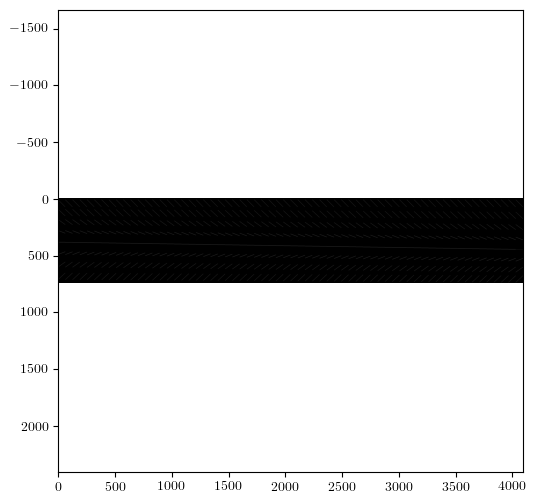

In [ ]:
matrix8 = radon.radon_matrix(torch.zeros((64,64)), thetas=torch.linspace(0.0, torch.pi, 9)[:-1]).reshape(-1, 64*64)

plt.close('all')
plt.figure(figsize=(6,6))
plt.imshow(matrix8, cmap="gray")
plt.axis("equal")
plt.show()

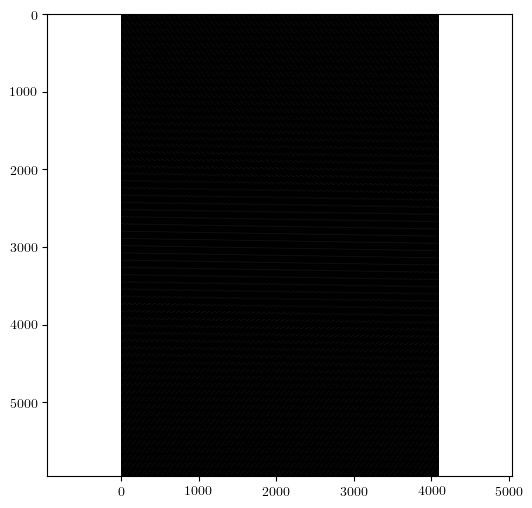

In [ ]:
matrix64 = radon.radon_matrix(torch.zeros((64,64)), thetas=torch.linspace(0.0, torch.pi, 65)[:-1]).reshape(-1, 64*64)

plt.close('all')
plt.figure(figsize=(6,6))
plt.imshow(matrix64, cmap="gray")
plt.axis("equal")
plt.show()

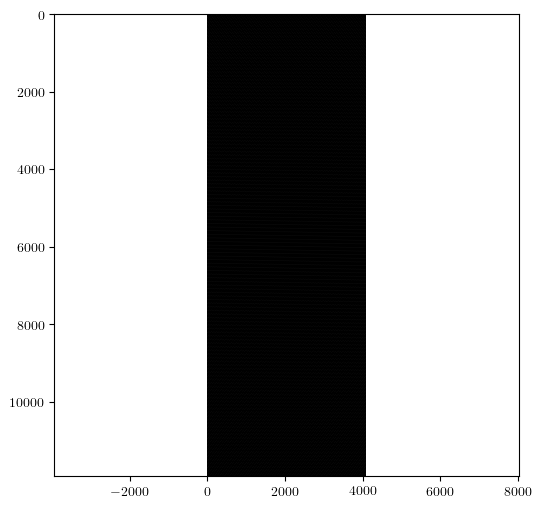

In [ ]:
matrix128 = radon.radon_matrix(torch.zeros((64,64)), thetas=torch.linspace(0.0, torch.pi, 129)[:-1]).reshape(-1, 64*64)

plt.close('all')
plt.figure(figsize=(6,6))
plt.imshow(matrix128, cmap="gray")
plt.axis("equal")
plt.show()

In [ ]:
v8,d8,ut8 = torch.linalg.svd(matrix8, full_matrices= True)
v128,d128,ut128 = torch.linalg.svd(matrix128, full_matrices= True)

In [ ]:
v64,d64,ut64 = torch.linalg.svd(matrix64, full_matrices= True)

In [ ]:
print(v8.shape)
print(v64.shape)
print(v128.shape)

torch.Size([744, 744])
torch.Size([5952, 5952])
torch.Size([11904, 11904])


In [ ]:
def sing_funcs_at_index(idx):
    left_sing_func = v8[:,idx].reshape(8,-1)
    right_sing_func = ut8[idx,:].reshape(64,64)
    fig,axs = plt.subplots(3,2)
    axs[0,0].imshow(left_sing_func.mT)
    axs[0,1].imshow(right_sing_func)

    left_sing_func = v64[:,idx].reshape(64,-1)
    right_sing_func = ut64[idx,:].reshape(64,64)
    axs[1,0].imshow(left_sing_func.mT)
    axs[1,1].imshow(right_sing_func)
    
    left_sing_func = v128[:,idx].reshape(128,-1)
    right_sing_func = ut128[idx,:].reshape(64,64)
    axs[2,0].imshow(left_sing_func.mT)
    axs[2,1].imshow(right_sing_func)

slider = widgets.IntSlider(min = 0, max = 743, step = 1, value = 0, continuous_update = True)
interactive_plot = interactive(sing_funcs_at_index, idx = slider)


In [ ]:
interactive_plot

interactive(children=(IntSlider(value=0, description='idx', max=743), Output(outputs=({'output_type': 'display…

interactive(children=(IntSlider(value=0, description='idx', max=4096), Output()), _dom_classes=('widget-intera…

In [ ]:
#1-D Fourier-Transform as a matrix
I = 10
J = 17
size = 10
F = torch.zeros(I*J, I*J, dtype = torch.cfloat)
for theta in range(I):
    for k in range(J):
        for s in range(J):
            F[J*theta+k, J*theta+s] = torch.polar(torch.Tensor([1/J]), torch.Tensor([-2*torch.pi*k*s/J]))

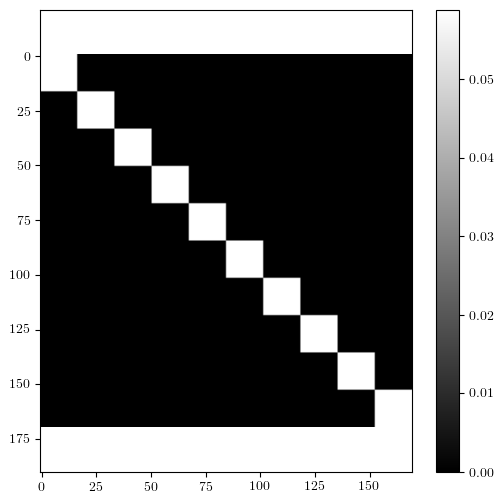

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(F.abs(), cmap="gray")
plt.colorbar()
plt.axis("equal")
plt.show()

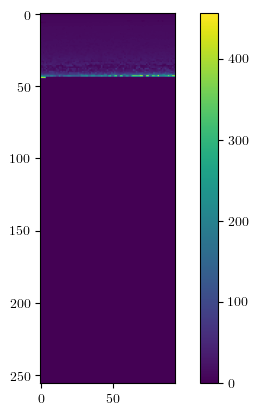

In [ ]:
coeffs = torch.load("results/svd_low_analytic/noise_level=0.005/coefficients.pt", map_location="cpu").detach()
sigma = torch.load("results/svd_low_analytic/noise_level=0.005/singularvals.pt", map_location='cpu').detach()

filter = torch.zeros(23808)
filter[:4096] = coeffs/sigma

filter_img  = filter.reshape(256, -1)

plt.imshow(filter_img)
plt.colorbar()
plt.show()